# MÁSTER UNIVERSITARIO EN CIENCIAS ACTUARIALES Y FINANCIERAS 
## RENTA VARIABLE Y DERIVADOS FINANCIEROS
### Práctica 4. Estrategias con opciones
#### Ha de crear un modelo que permita obtener las estrategias de "Condor comprado" y "Condor vendido" de forma automática al cambiar los activos necesarios que componen la cartera.

In [ ]:
# Instalación librerías
pip install matplotlib
pip install numpy


----------------------------------------
Precio Spot sim.: [75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
Beneficio call 1: [-6. -6. -6. -6. -6. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.]
Beneficio call 2: [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
Beneficio call 3: [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
Beneficio call 4: [-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.]
----------------------------------------



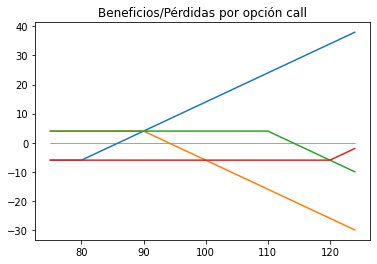

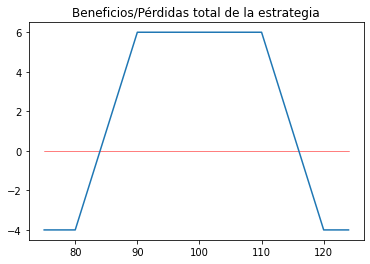

In [31]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt

### SELECCIÓN DE LA ESTRATEGIA "CONDOR"
# (indicar "comprado" o "vendido")
condor = "comprado"

### DATOS
# Cantidad de títulos
q = 1
# Precios strike de cada opción call
e_1 = 80
e_2 = 90
e_3 = 110
e_4 = 120
# Prima de cada opción call
p_1 = 6
p_2 = 4
p_3 = 4
p_4 = 6
# Datos para las simulaciones de precio spot
s_min = 75 #spot mínimo
n_sim = 50 #número de simulaciones
ampl = 1 #amplitud del rango

### CÁLCULO DE PARÁMETROS FIJOS

#posiciones en cada call
if condor == "comprado":
  pos_1 = "compra"
  pos_2 = "venta"
  pos_3 = "venta"
  pos_4 = "compra"
else:
  pos_1 = "venta"
  pos_2 = "compra"
  pos_3 = "compra"
  pos_4 = "venta"

#spot máximo en las simulaciones
s_max = s_min + n_sim * ampl

### SIMULACIONES

#se crean los vectores para las simulaciones
s_sim = np.zeros(n_sim)
b_1 = np.zeros(n_sim)
b_2 = np.zeros(n_sim)
b_3 = np.zeros(n_sim)
b_4 = np.zeros(n_sim)

#Simulacion de beneficios/pérdidas
for i in range(0, n_sim):

    if i == 0:
      s_sim[i] = s_min
    else:
      s_sim[i] = s_sim[i-1] + ampl
    
    if pos_1 == "compra":
      b_1[i] = max(0,s_sim[i]-e_1) - p_1

    if pos_1 == "venta":
      b_1[i] = -(max(0,s_sim[i]-e_1)) + p_1

    if pos_2 == "compra":
      b_2[i] = max(0,s_sim[i]-e_2) - p_2

    if pos_2 == "venta":
      b_2[i] = -(max(0,s_sim[i]-e_2)) + p_2

    if pos_3 == "compra":
      b_3[i] = max(0,s_sim[i]-e_3) - p_3

    if pos_3 == "venta":
      b_3[i] = -(max(0,s_sim[i]-e_3)) + p_3

    if pos_4 == "compra":
      b_4[i] = max(0,s_sim[i]-e_4) - p_4

    if pos_4 == "venta":
      b_4[i] = -(max(0,s_sim[i]-e_4)) + p_4

b_total = b_1 + b_2 + b_3 + b_4

# Resultados de la simulación (se muestran los primeros 15 valores)
print(f"""
{'-'*40}
Precio Spot sim.: {s_sim[:15]}
Beneficio call 1: {b_1[:15]}
Beneficio call 2: {b_2[:15]}
Beneficio call 3: {b_3[:15]}
Beneficio call 4: {b_4[:15]}
{'-'*40}
""")

# Visualización gráfica por call
plt.title('Beneficios/Pérdidas por opción call')
plt.plot(s_sim, np.zeros(n_sim), label = "ganancia = 0", color="red", linewidth=0.5)
plt.plot(s_sim, b_1, label = "ganancia_1")
plt.plot(s_sim, b_2, label = "ganancia_2")
plt.plot(s_sim, b_3, label = "ganancia_3")
plt.plot(s_sim, b_4, label = "ganancia_4")
plt.show()

# Visualización gráfica de la estrategia total
plt.title('Beneficios/Pérdidas total de la estrategia')
plt.plot(s_sim, np.zeros(n_sim), label = "ganancia = 0", color="red", linewidth=0.5)
plt.plot(s_sim, b_total, label = "ganancia_total")
plt.show()